## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [4]:
# Installing the libraries with the specified version.
# !pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost
# import imbalanced-learn
import threadpoolctl

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import fbeta_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline

## Loading the dataset

In [8]:
base_train = pd.read_csv('Train.csv')
base_test = pd.read_csv('Test.csv')

## Data Overview

- Observations
- Sanity checks

In [11]:
base_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [12]:
base_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


### Missing Values
Reviewing the two cells below, both the training data and the test data have missing values in features V1 and V2 only.

In [14]:
base_train.isna().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [15]:
base_test.isna().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

### Basic Dataset Information

In [17]:
base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

All features are floats and the target is an integer.

In [19]:
base_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [20]:
base_train.shape

(20000, 41)

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

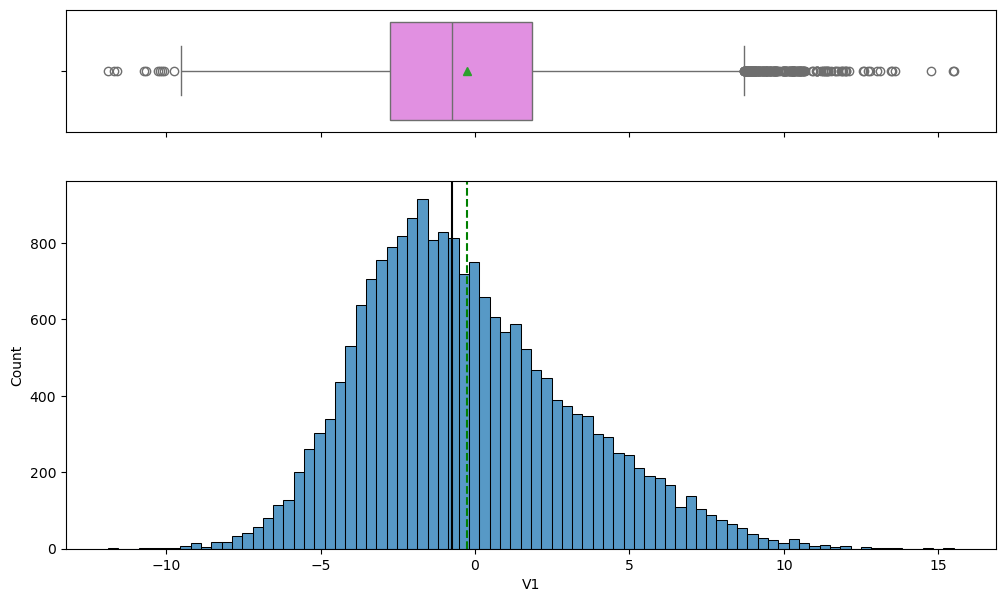

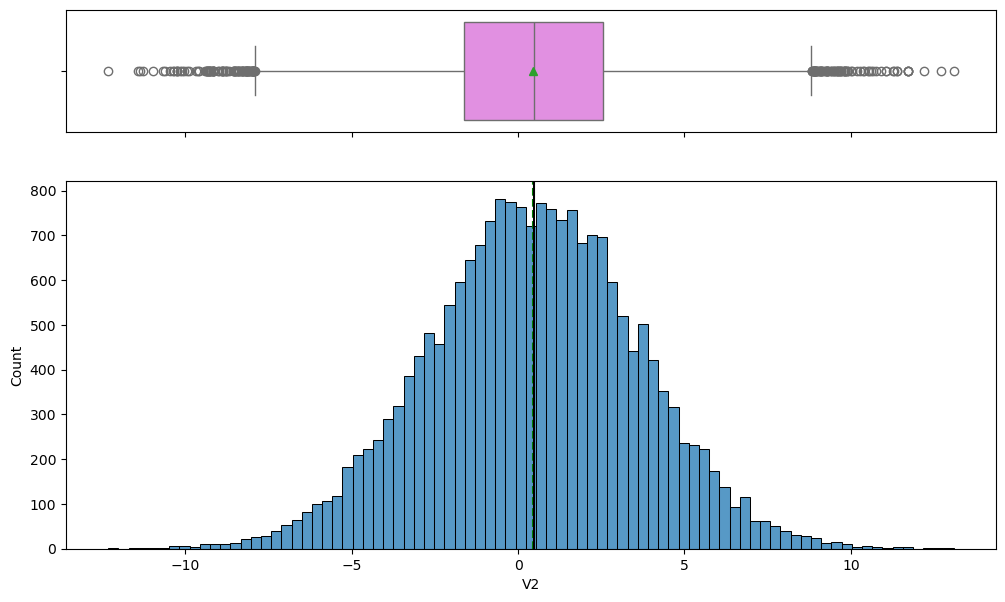

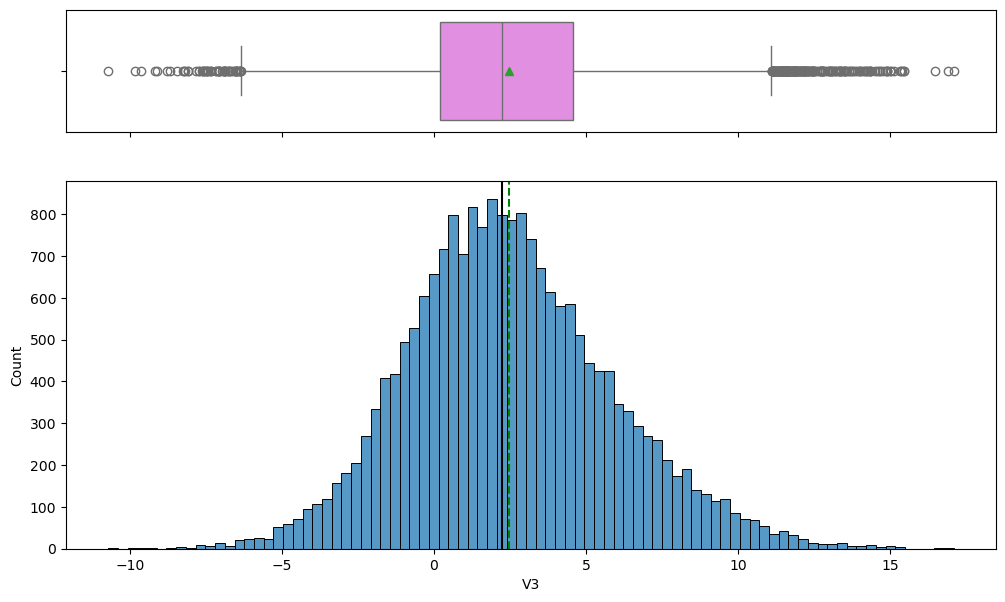

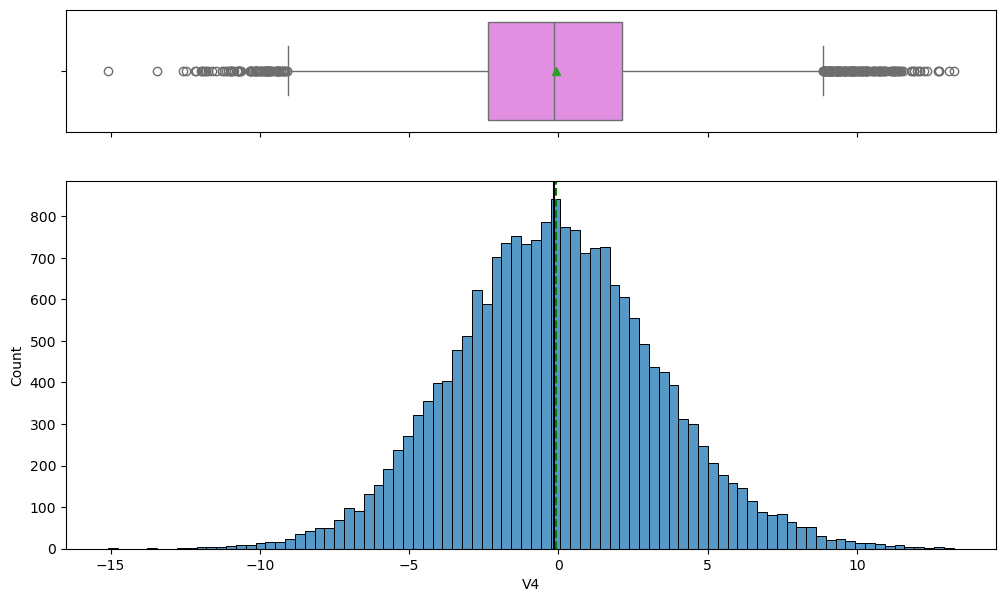

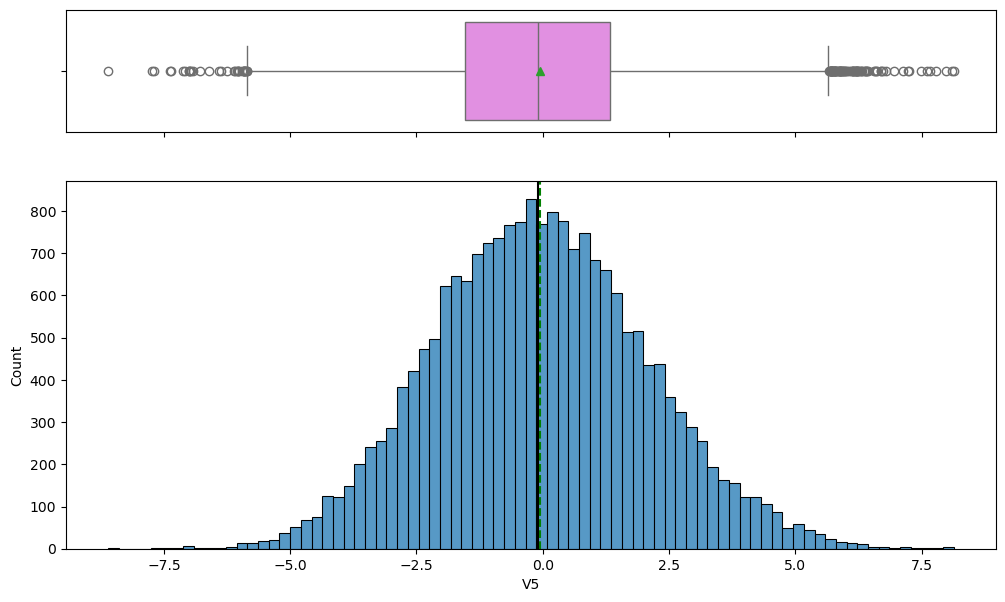

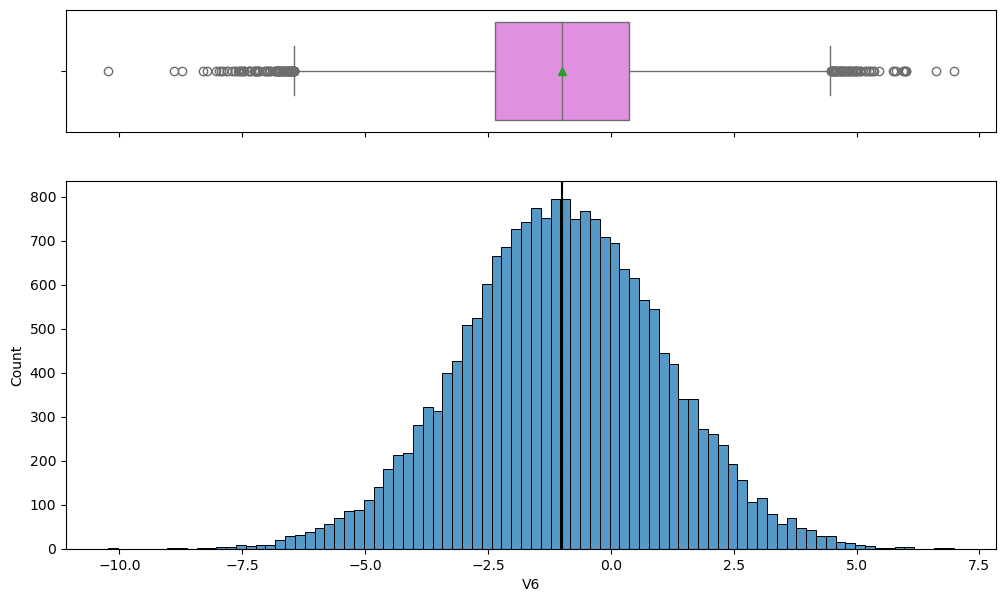

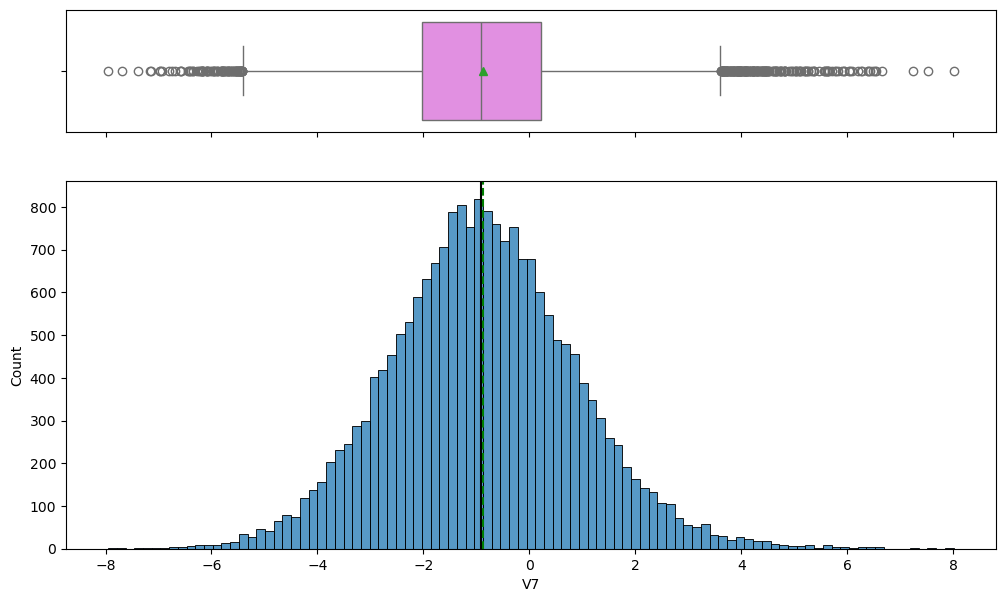

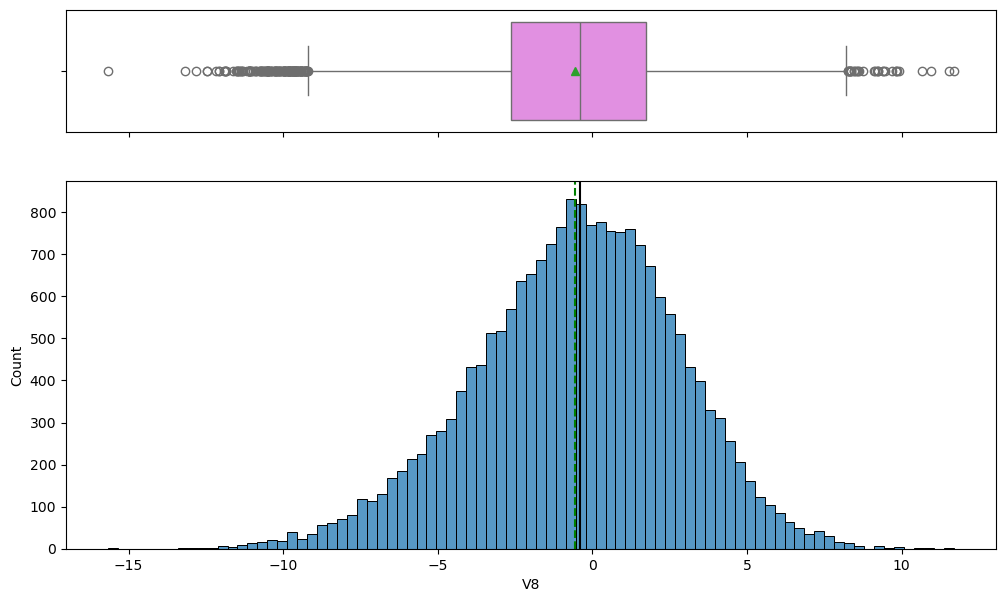

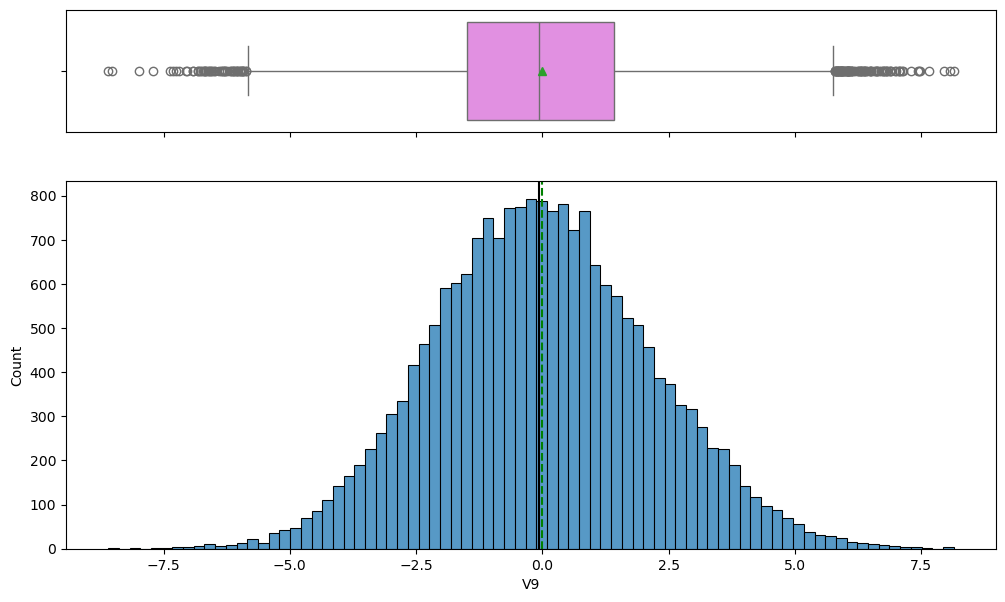

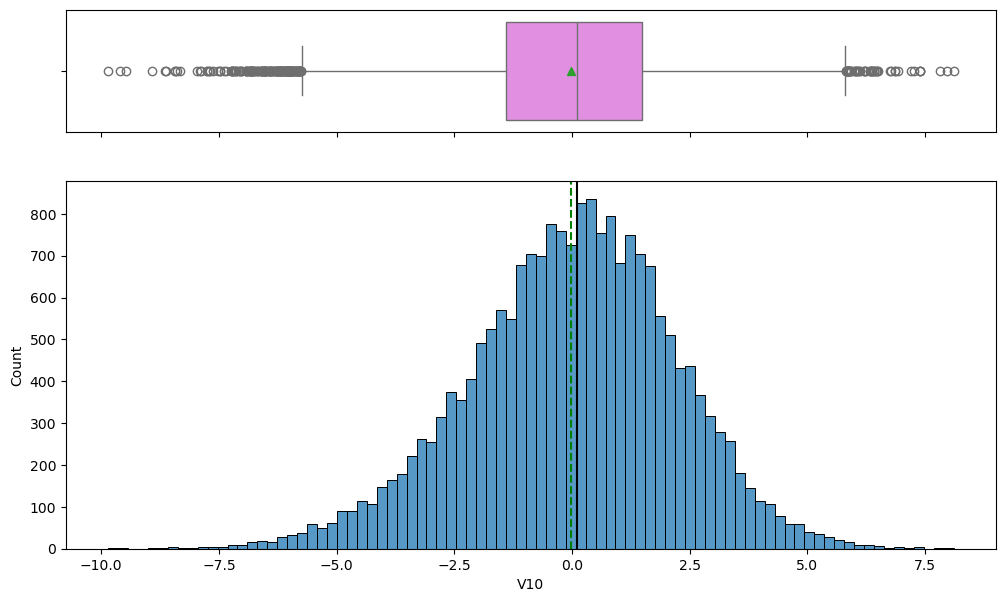

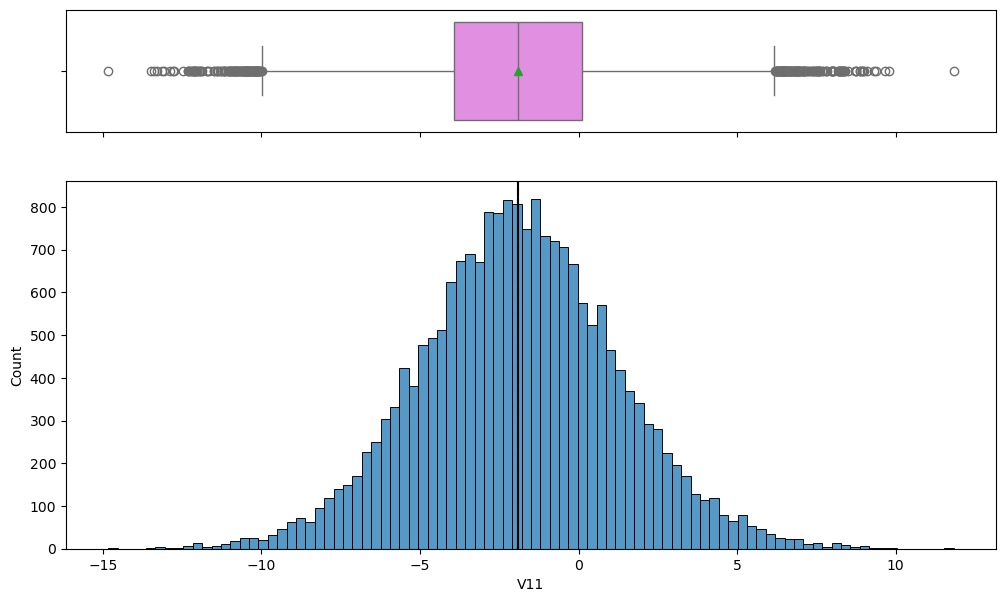

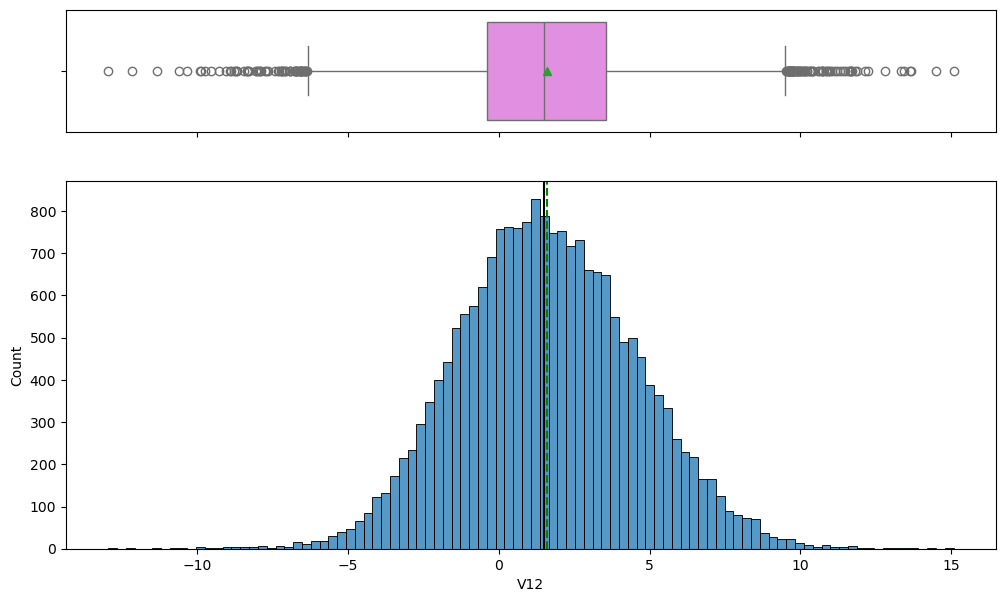

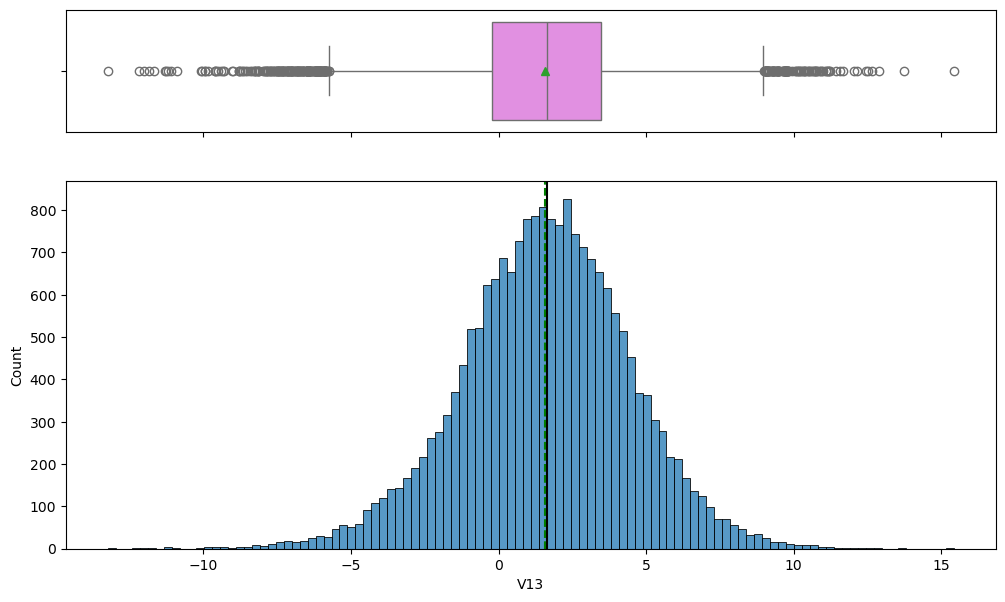

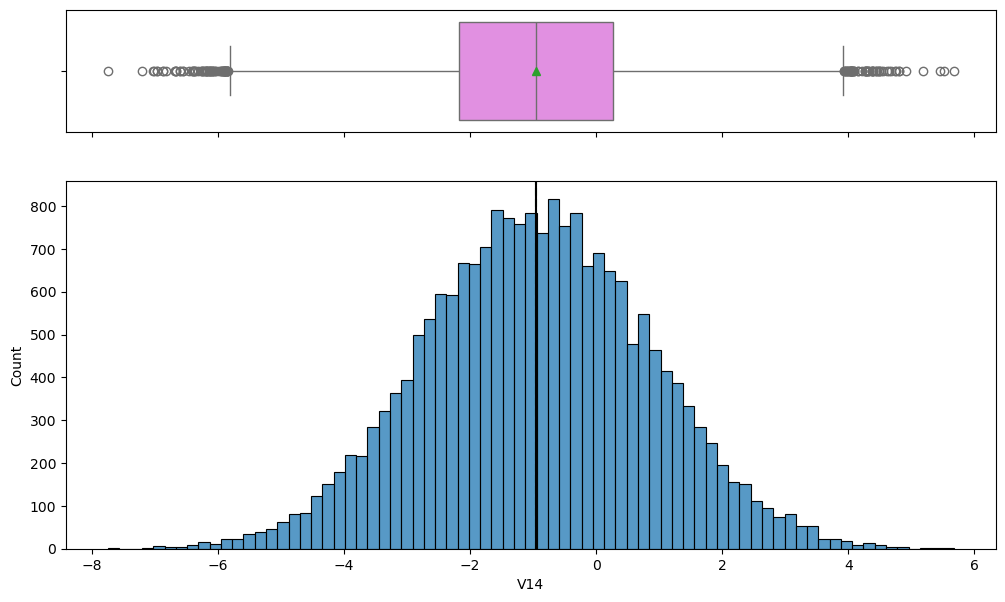

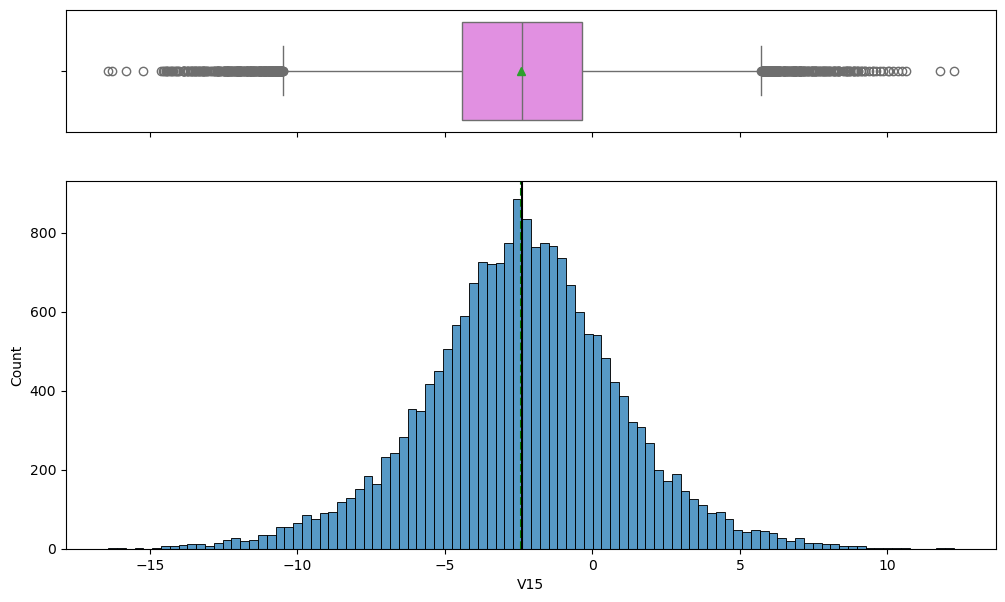

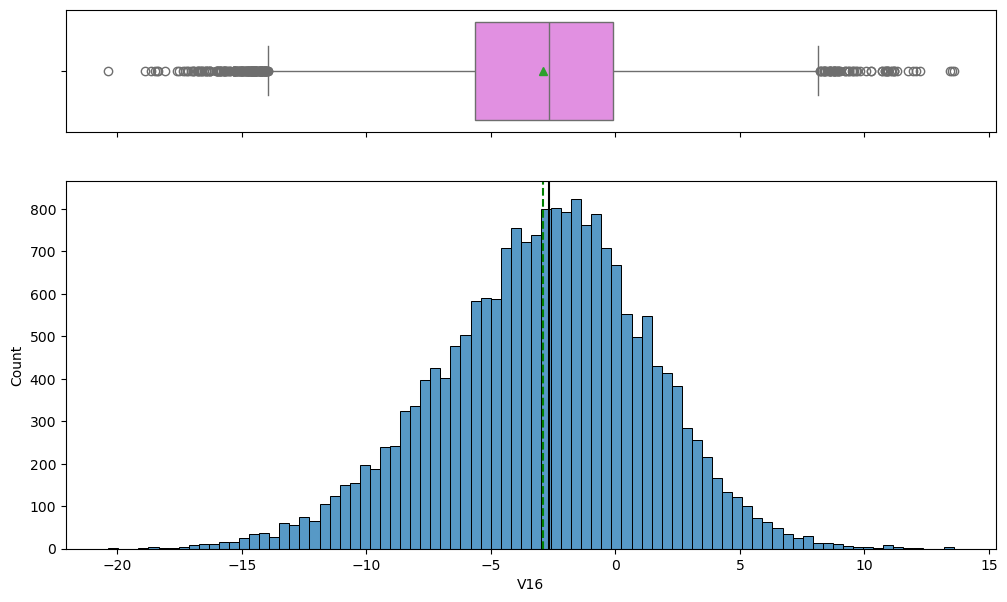

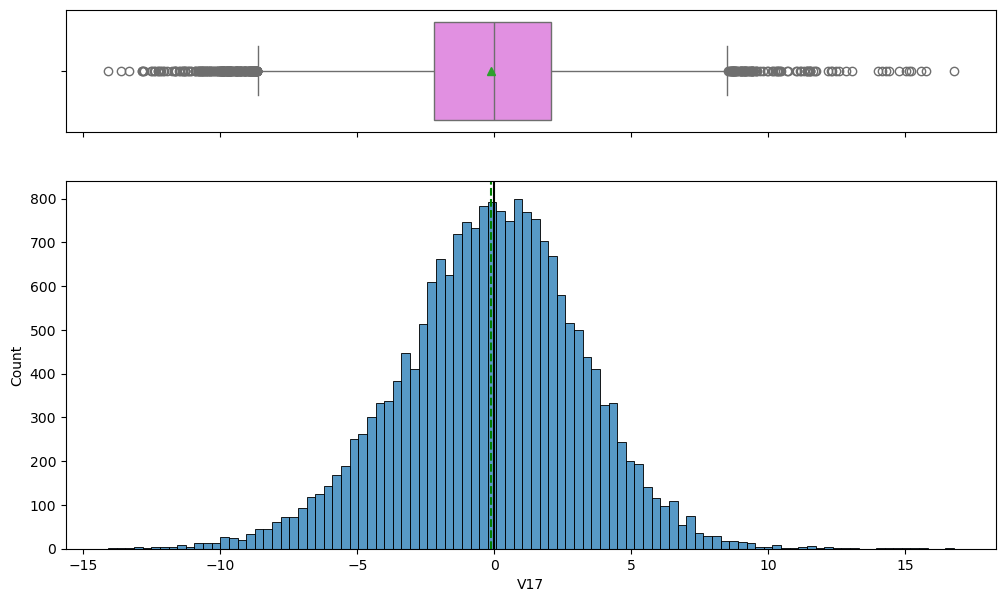

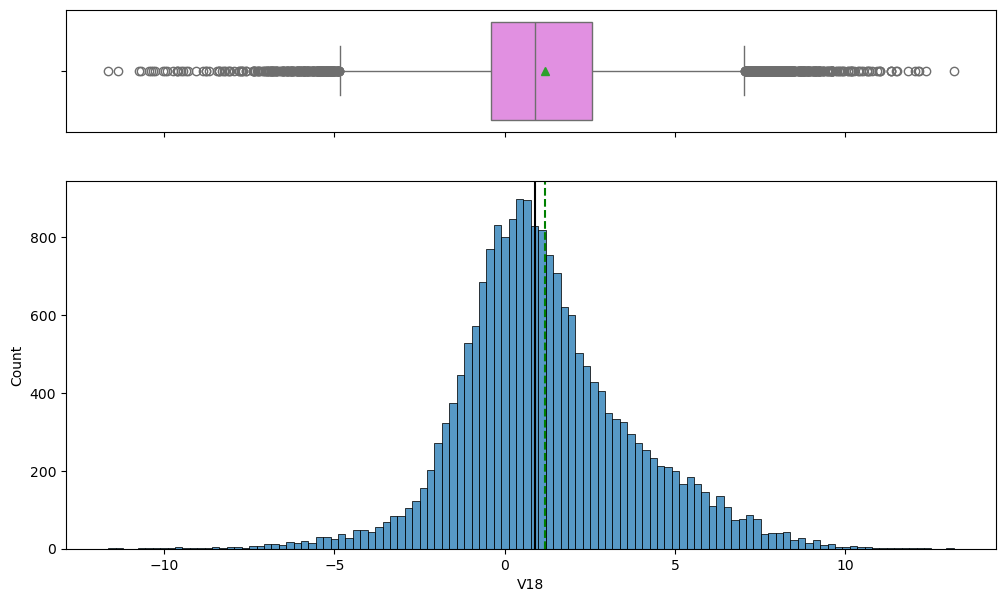

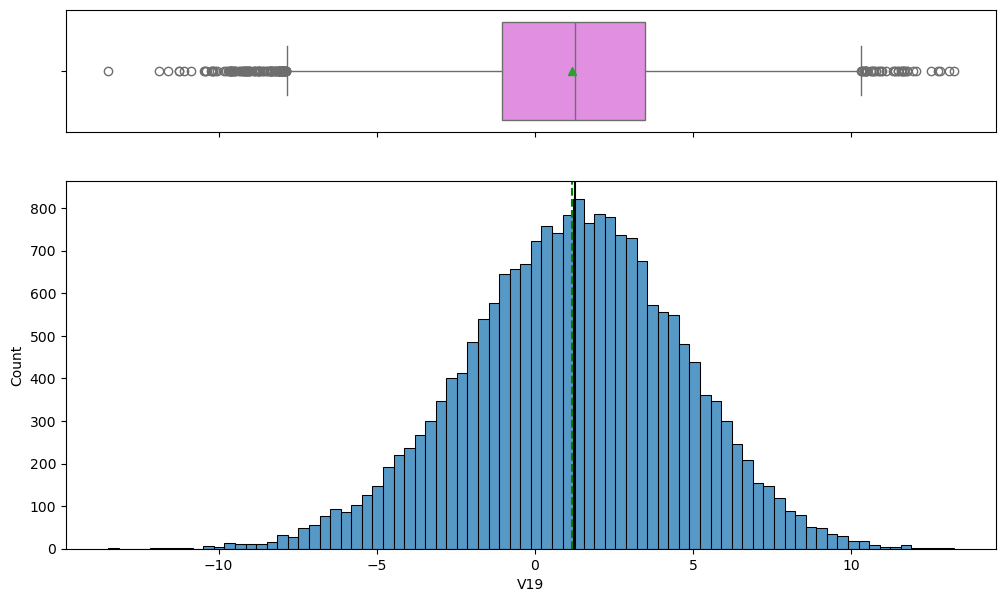

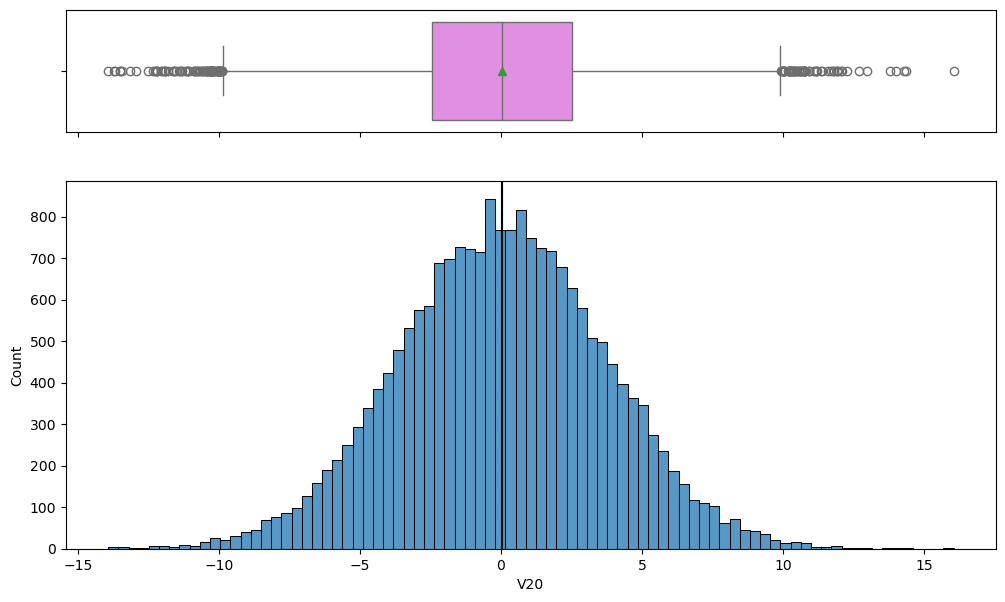

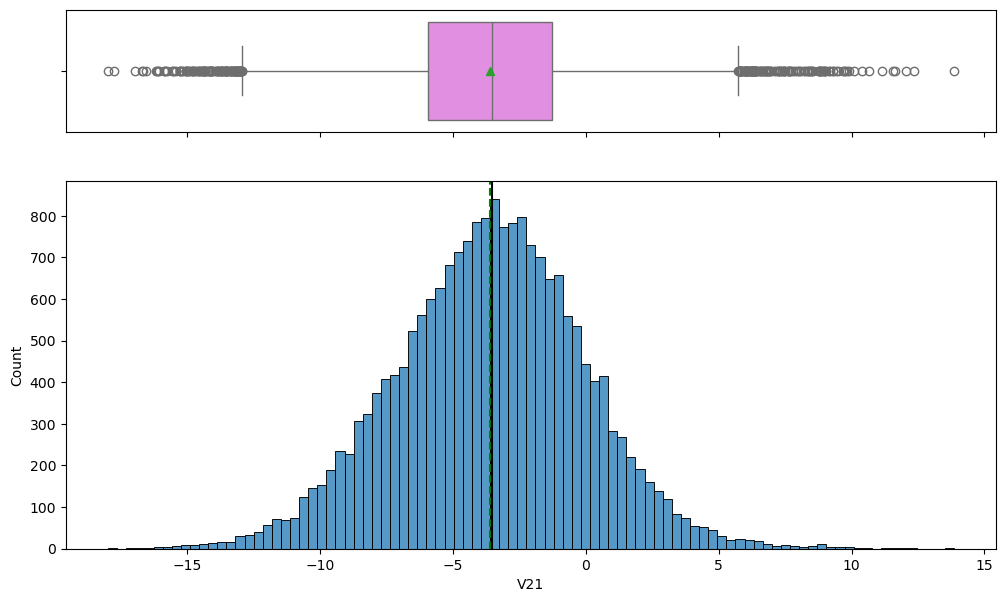

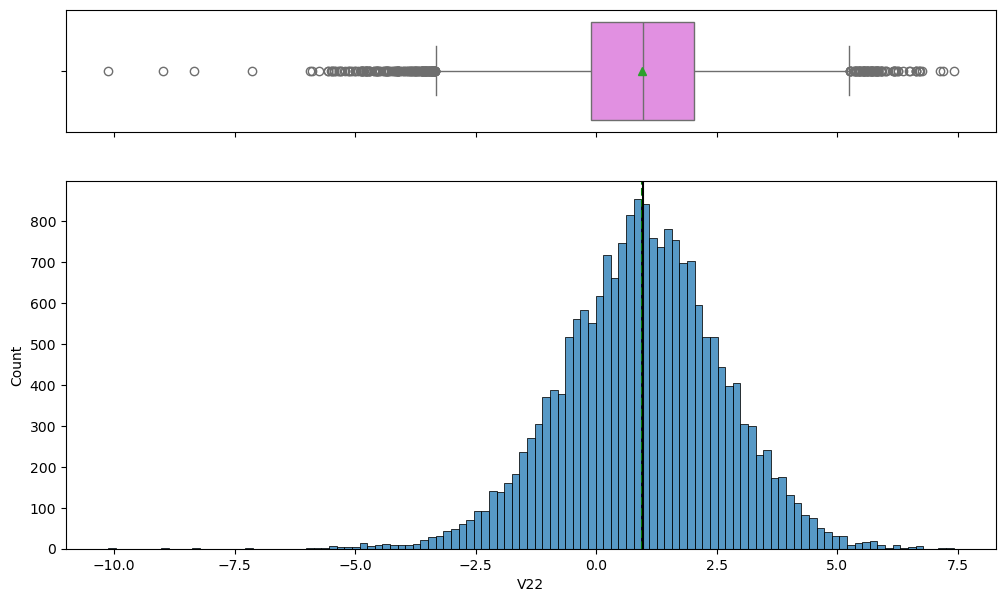

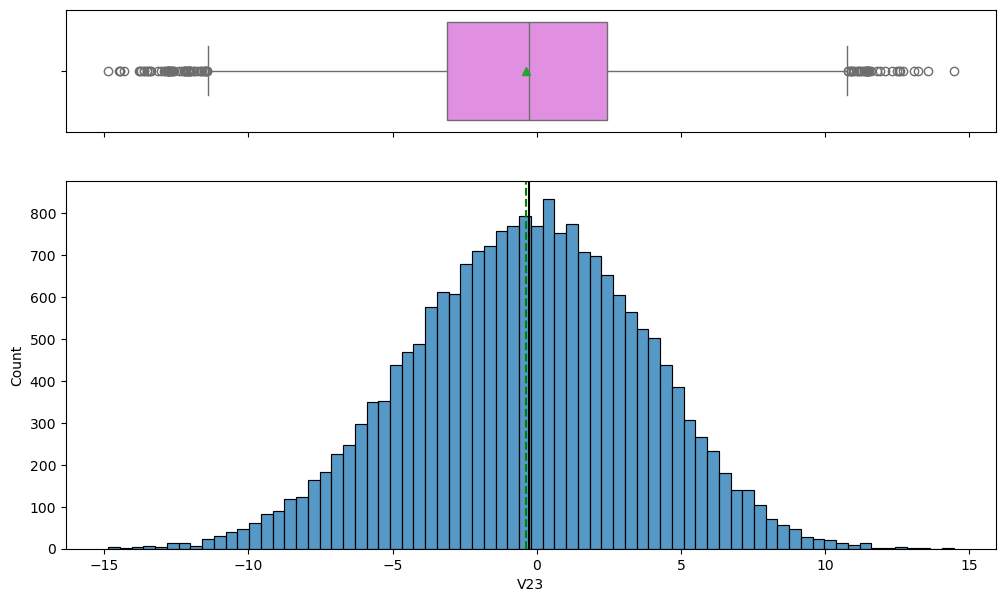

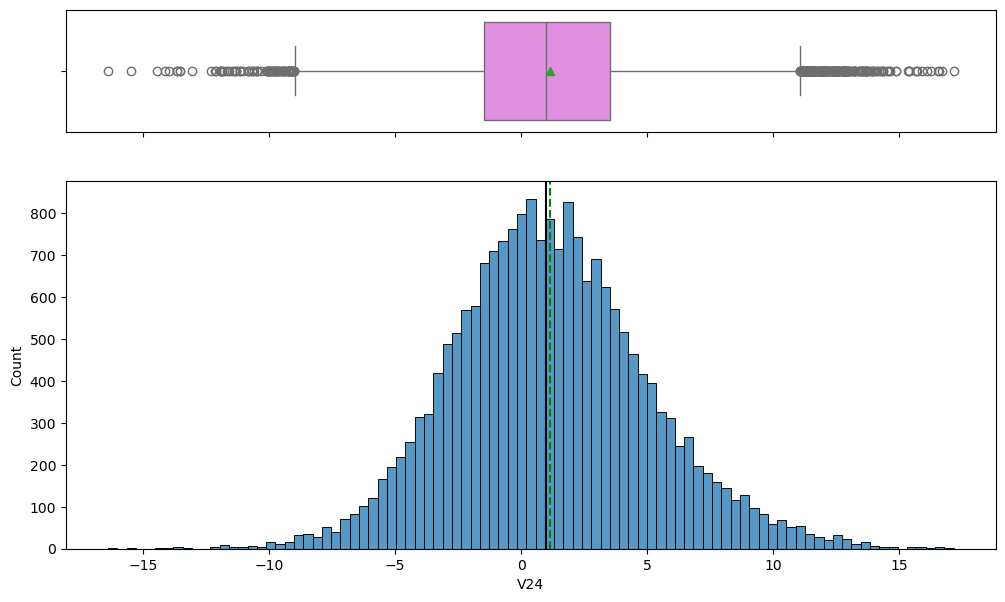

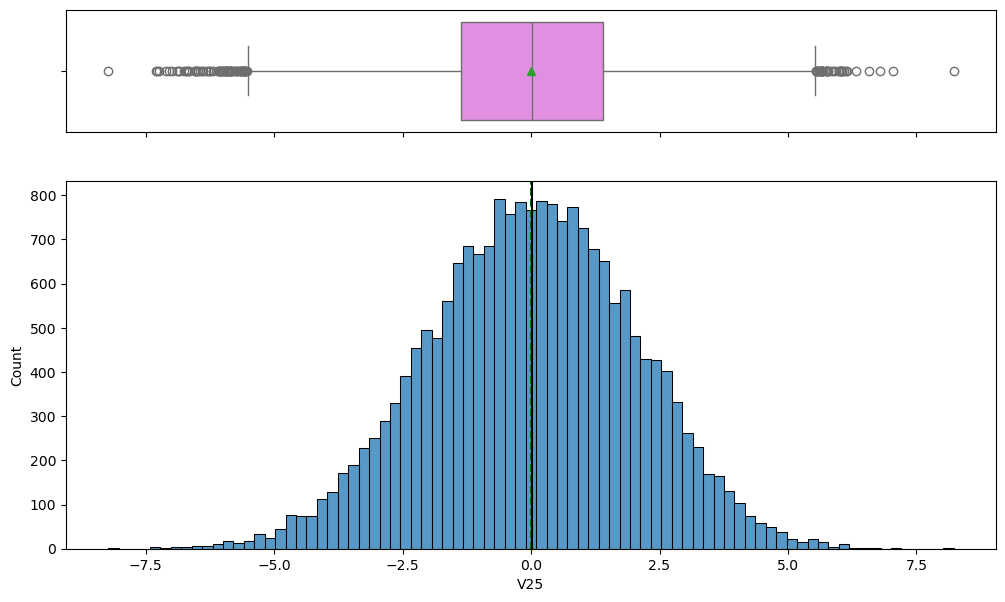

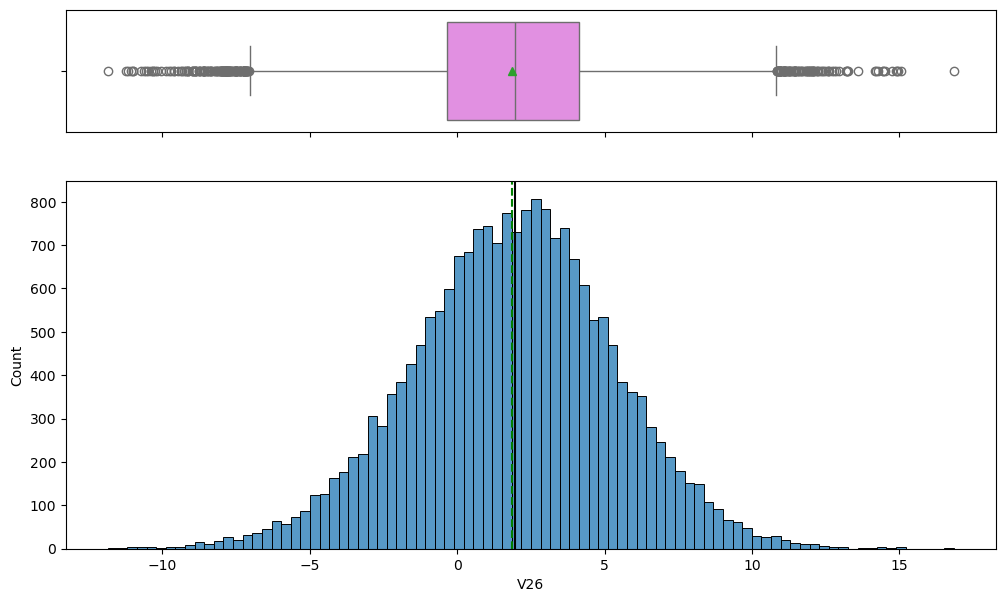

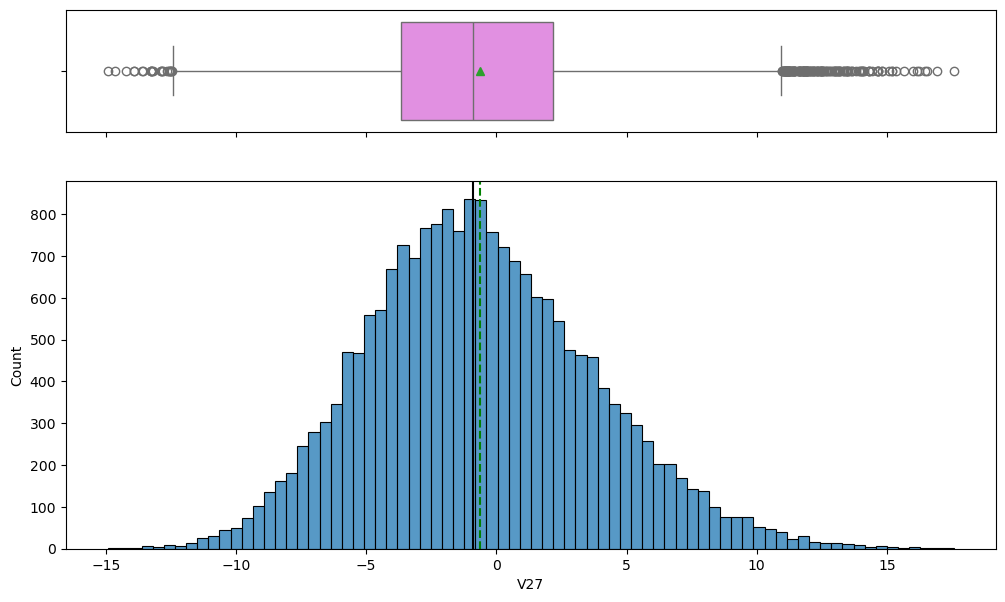

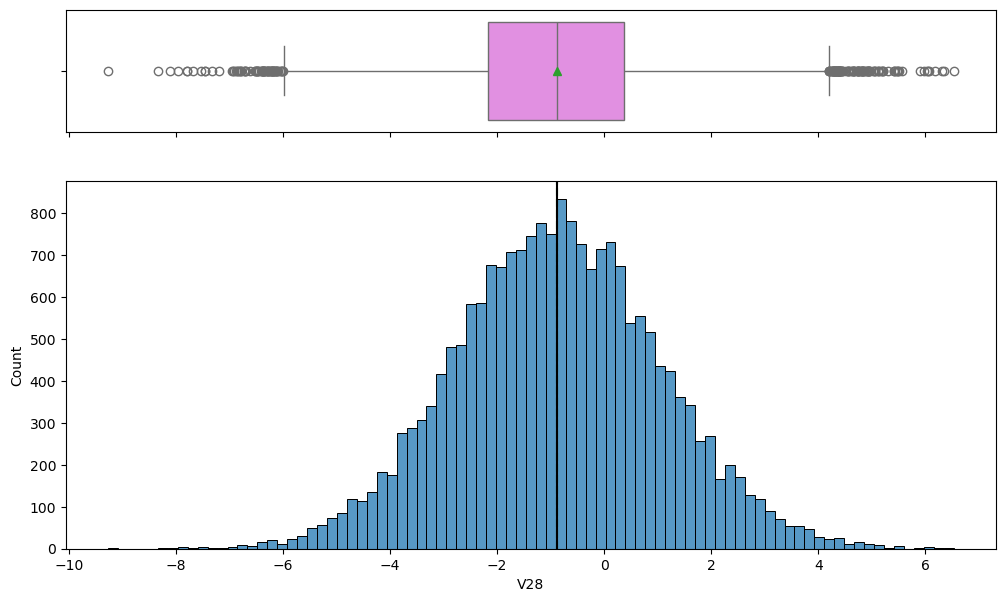

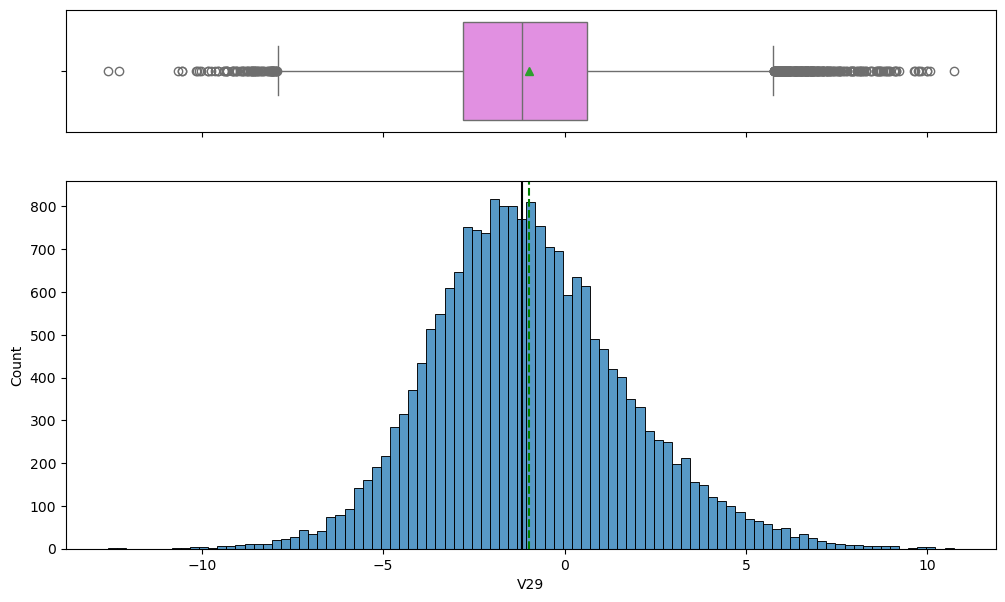

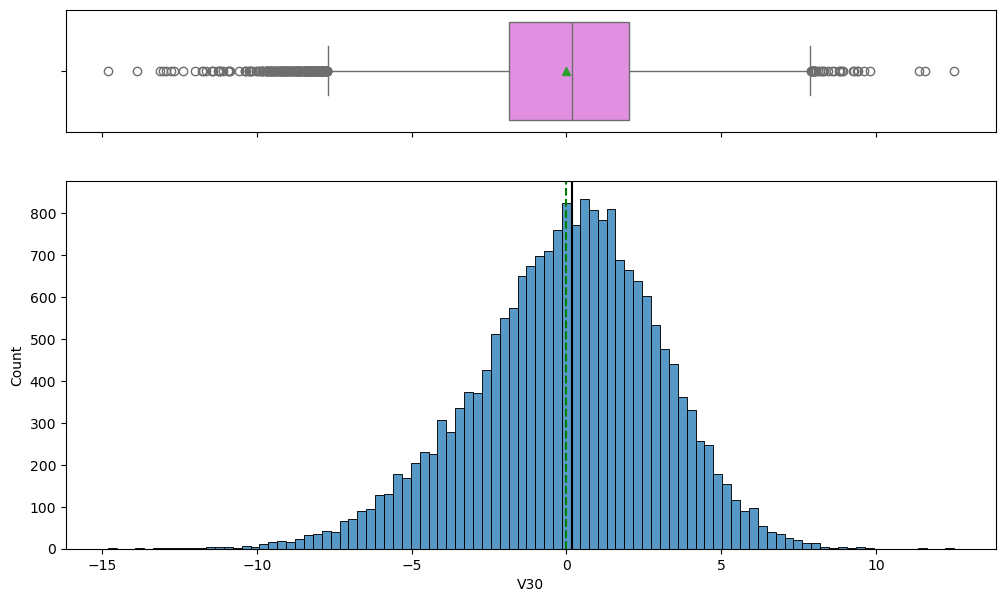

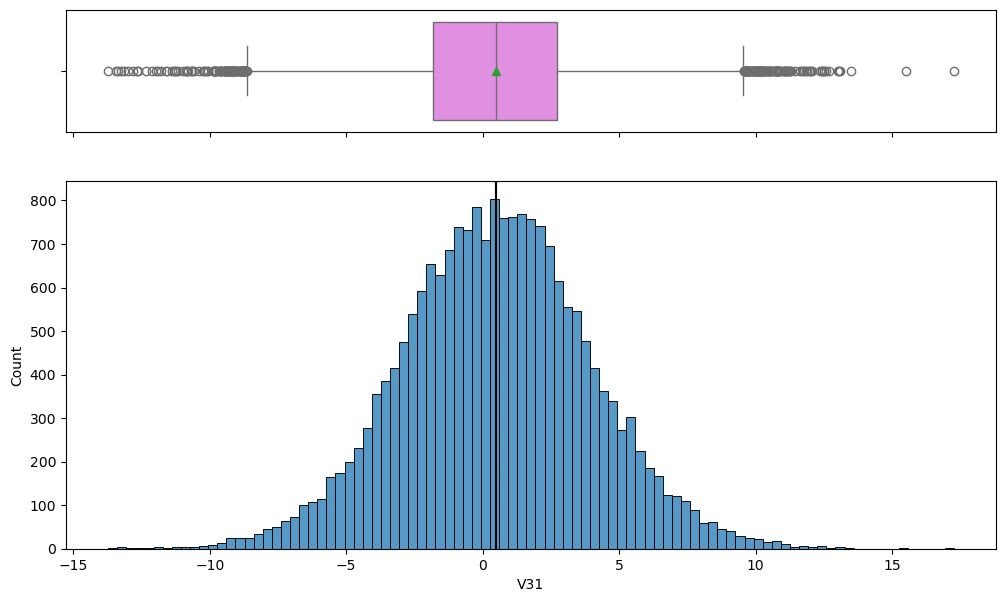

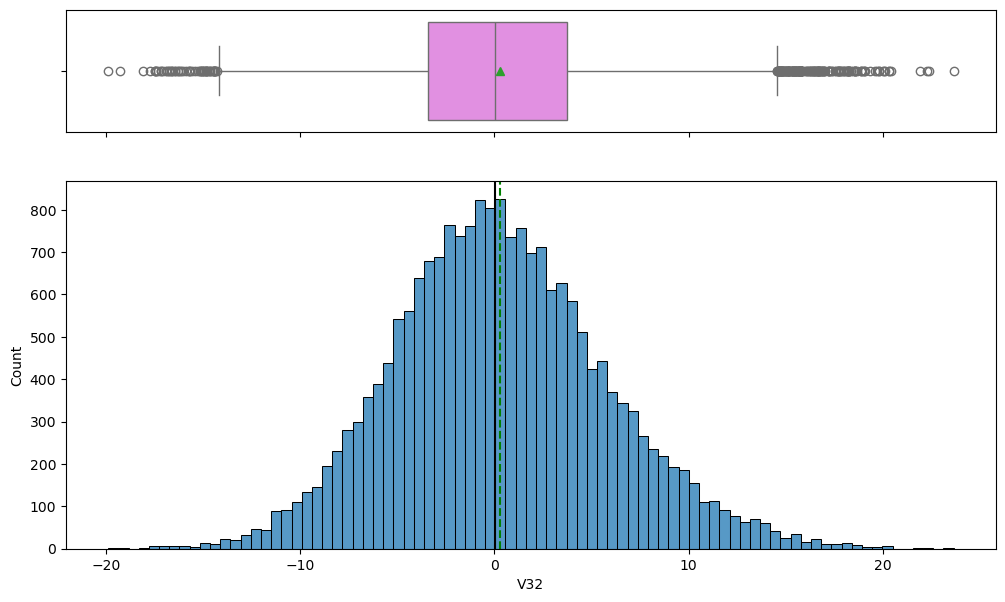

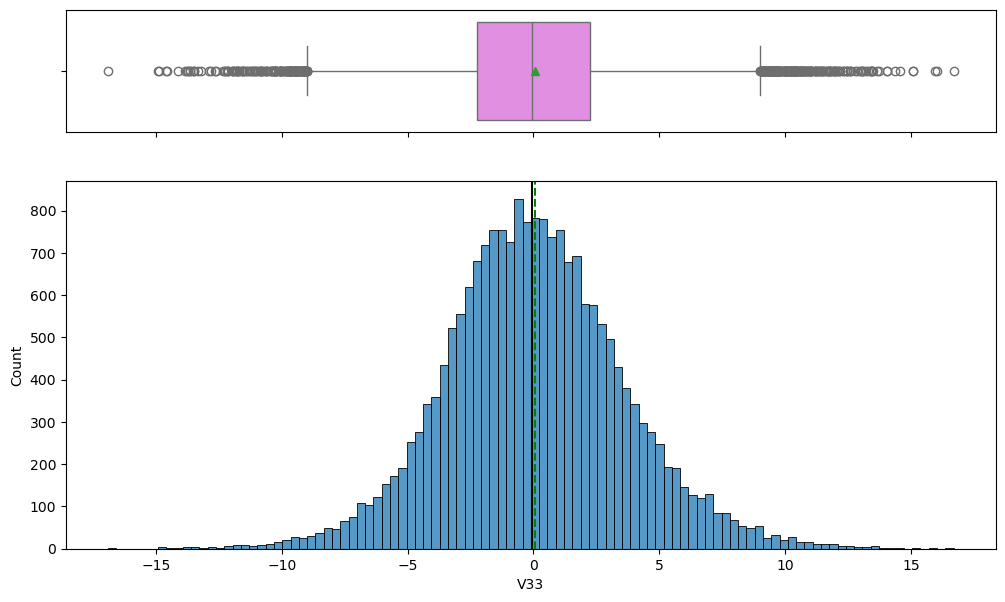

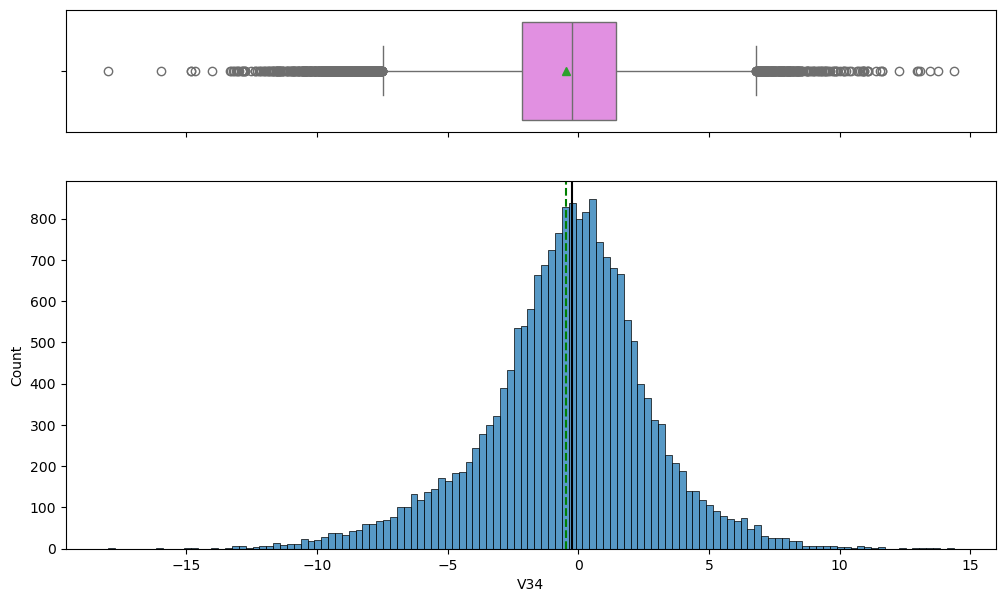

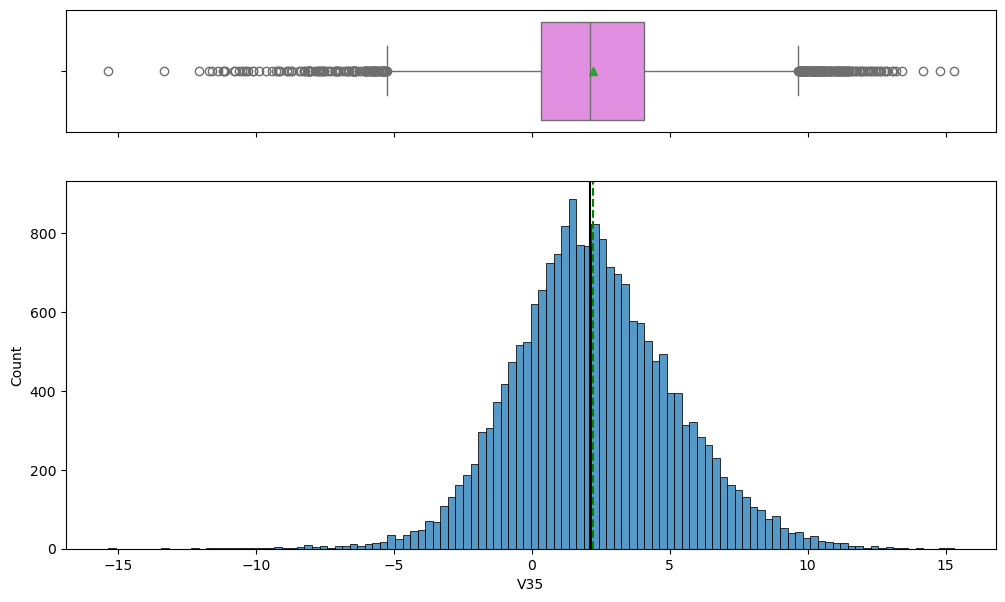

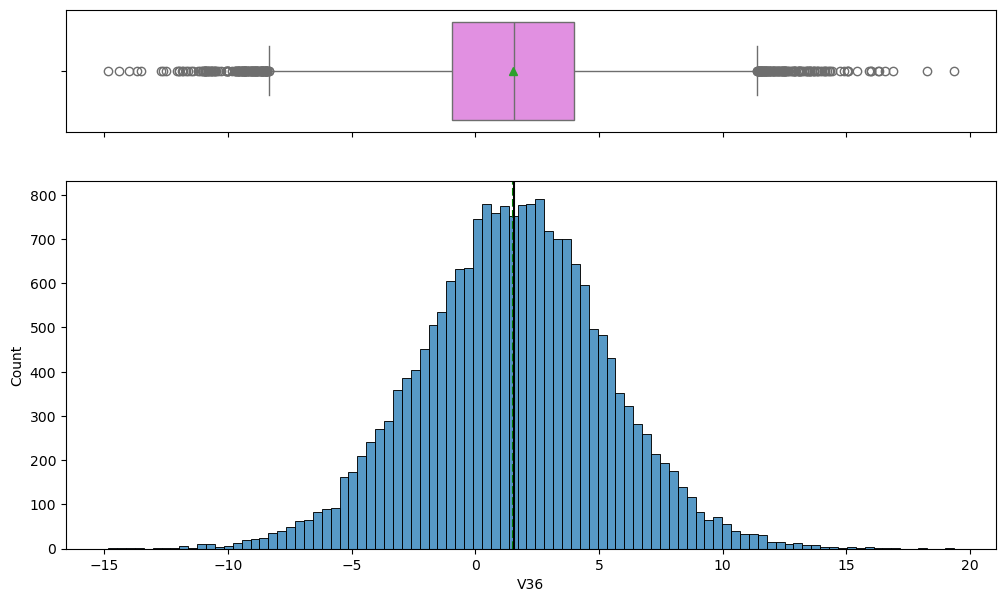

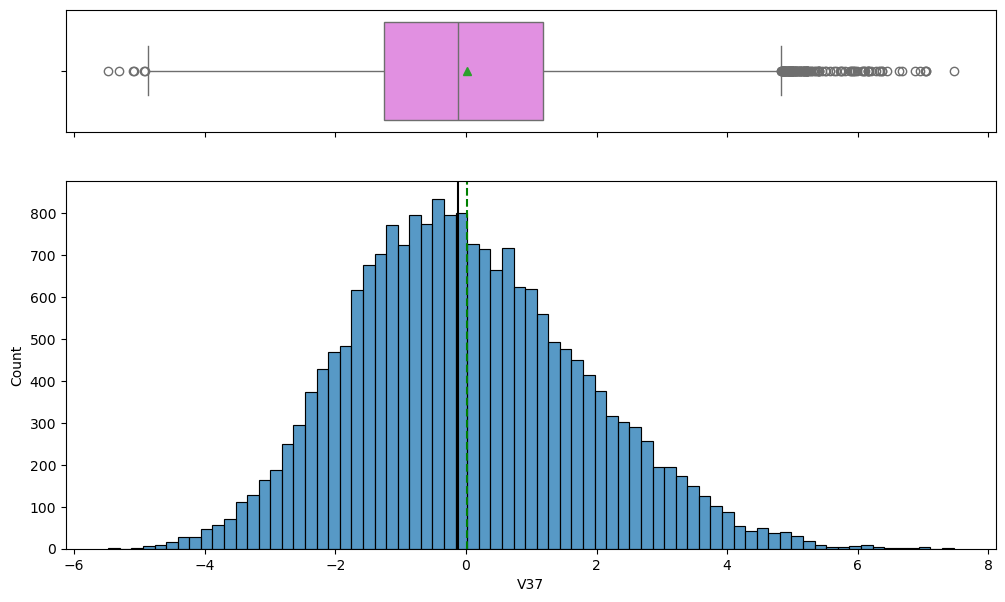

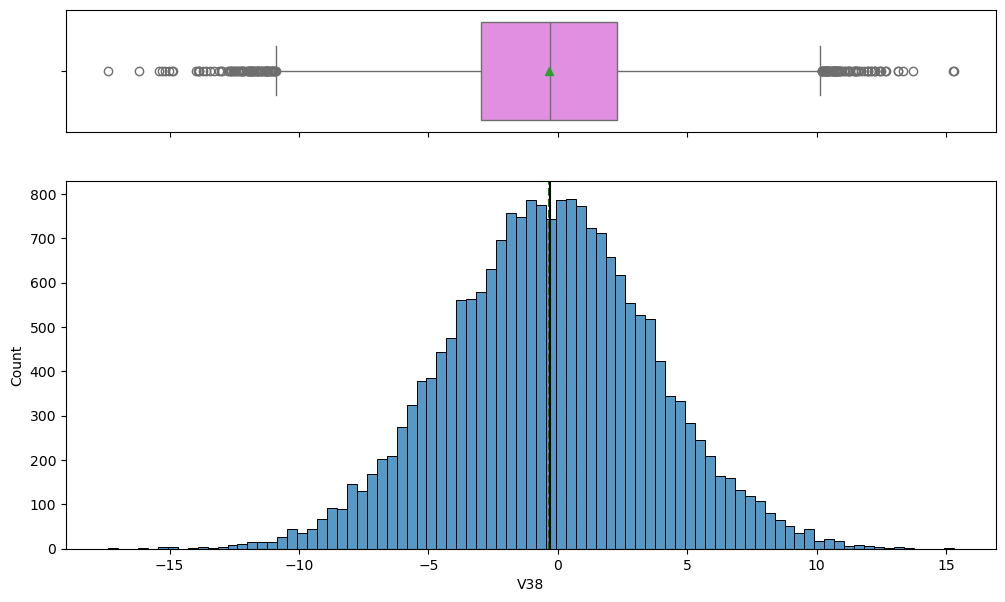

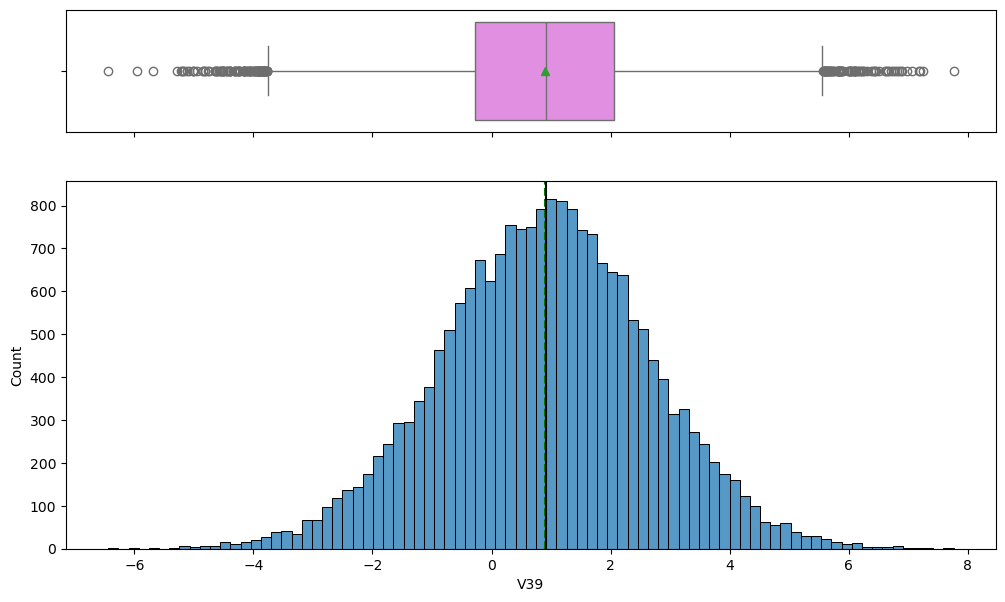

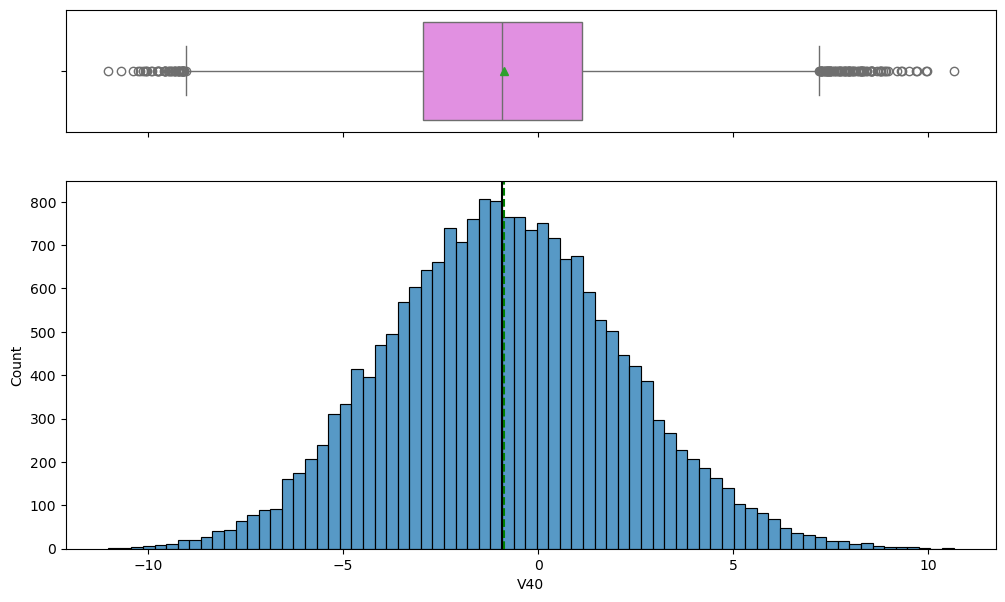

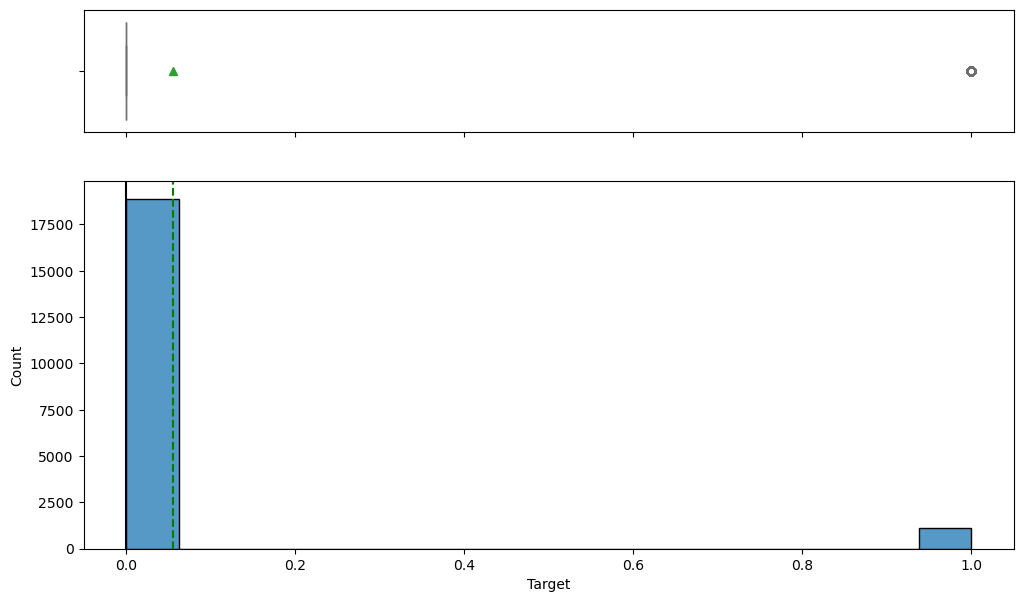

In [25]:
for feature in base_train.columns:
    histogram_boxplot(base_train, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data ;

It appears that all of the features have outliers. They do appear to have a nice distribution. These will need to be dealt with. 

#### Correlation Heatmap

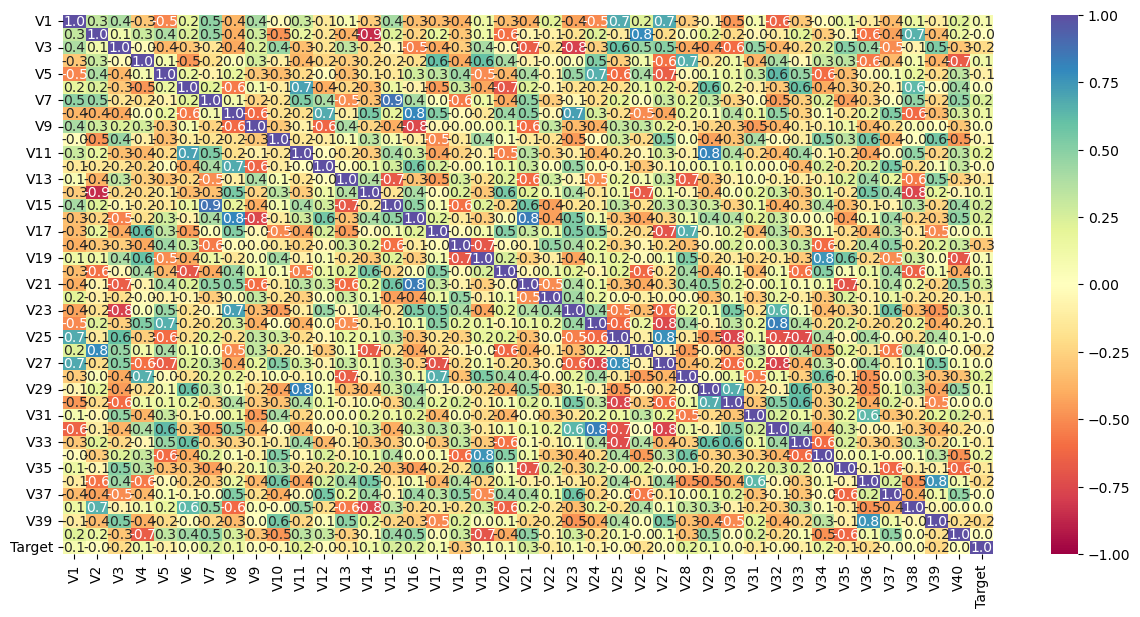

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(base_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral");

While the heatmap is a bit hard to see, there no features with a high level/perfect of correlation to other features. 

## Data Pre-processing

In [31]:
y_test = base_test['Target']
X_test = base_test.drop(columns="Target")

In [32]:
y = base_train['Target']
X = base_train.drop(columns="Target")

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=11)

### Missing value imputation




In [35]:
imputer = SimpleImputer(strategy="median")

In [36]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [37]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

### Scale Data

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(X_train)

StandardScaler()

In [41]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [47]:
def get_metrics_score2(model, X_train, X_test, y_train, y_test, flag=True):
    '''
    model : classifier to predict values of X
    X_train, X_test : feature data for training and testing
    y_train, y_test : target values for training and testing
    flag : if True, print the metrics
    '''
    # Making predictions for train and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # pred_test = np.array([0 if label == 'Certified' else 1 for label in pred_test_A])
    # print(pred_test)

    # Calculating accuracy for train and test sets
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
       
    # Calculating recall for train and test sets
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    # Calculating precision for train and test sets
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    # Defining the score list with all calculated metrics
    score_list = [train_acc, test_acc, train_recall, test_recall, train_precision, test_precision]
        
    # If the flag is set to True, print the metrics
    if flag:
        print("Accuracy on training set : ", train_acc)
        print("Accuracy on test set : ", test_acc)
        print("Recall on training set : ", train_recall)
        print("Recall on test set : ", test_recall)
        print("Precision on training set : ", train_precision)
        print("Precision on test set : ", test_precision)
    
    # return score_list  # Returning the list with train and test scores

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [50]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("clr", LogisticRegression()))
models.append(("ada", AdaBoostClassifier()))
models.append(("RandFor", RandomForestClassifier()))
models.append(("GBC", GradientBoostingClassifier()))
models.append(("BagClass", BaggingClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("SVC", SVC()))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7195530726256983
clr: 0.47262569832402235
ada: 0.5910614525139666
RandFor: 0.7273743016759776
GBC: 0.7150837988826815
BagClass: 0.6893854748603352
XGB: 0.7988826815642458
SVC: 0.8357541899441341

Validation Performance:

dtree: 0.7302325581395349
clr: 0.5534883720930233
ada: 0.6232558139534884
RandFor: 0.7581395348837209
GBC: 0.772093023255814
BagClass: 0.7627906976744186
XGB: 0.813953488372093
SVC: 0.8511627906976744


### Model Building with Oversampled data


In [55]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [56]:
models1 = []  # Empty list to store all the models

# Appending models into the list
models1.append(("dtree", DecisionTreeClassifier(random_state=1)))
models1.append(("clr", LogisticRegression()))
models1.append(("ada", AdaBoostClassifier()))
models1.append(("RandFor", RandomForestClassifier()))
models1.append(("GBC", GradientBoostingClassifier()))
models1.append(("BagClass", BaggingClassifier()))
models1.append(("XGB", XGBClassifier()))
models1.append(("SVC", SVC()))

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models1:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names2.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models1:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9697451175107581
clr: 0.873684210526316
ada: 0.8946044356173453
RandFor: 0.9844422376696457
GBC: 0.9221449851042701
BagClass: 0.9781529294935452
XGB: 0.9896060906984442
SVC: 0.9263157894736842

Validation Performance:

dtree: 0.7581395348837209
clr: 0.8744186046511628
ada: 0.8558139534883721
RandFor: 0.8418604651162791
GBC: 0.8976744186046511
BagClass: 0.813953488372093
XGB: 0.8883720930232558
SVC: 0.9116279069767442


### Model Building with Undersampled data

In [58]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [59]:
models2 = []  # Empty list to store all the models

# Appending models into the list
models2.append(("dtree", DecisionTreeClassifier(random_state=1)))
models2.append(("clr", LogisticRegression()))
models2.append(("ada", AdaBoostClassifier()))
models2.append(("RandFor", RandomForestClassifier()))
models2.append(("GBC", GradientBoostingClassifier()))
models2.append(("BagClass", BaggingClassifier()))
models2.append(("XGB", XGBClassifier()))
models2.append(("SVC", SVC()))

results3 = []  # Empty list to store all model's CV scores
names3 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models2:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names3.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models2:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8446927374301676
clr: 0.8458100558659218
ada: 0.8614525139664805
RandFor: 0.8905027932960893
GBC: 0.8860335195530726
BagClass: 0.8659217877094972
XGB: 0.8983240223463687
SVC: 0.8916201117318435

Validation Performance:

dtree: 0.8511627906976744
clr: 0.8744186046511628
ada: 0.8651162790697674
RandFor: 0.9069767441860465
GBC: 0.9023255813953488
BagClass: 0.8697674418604651
XGB: 0.9069767441860465
SVC: 0.9116279069767442


## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

- For SVC:

param_grid={
    'C': [0.8,0.9,1,1.1,1.25],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [2,3,4],
    'gamma': ['auto', 'scale'],
    'class_weight': ['none', 'balance']
}

### Sample tuning method for Decision tree with original data

In [64]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5508379888268157:


### Sample tuning method for Decision tree with oversampled data

In [66]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9026812313803376:


### Sample tuning method for Decision tree with undersampled data

In [68]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.8245810055865922:


### Support Vector Classifier

#### SVC With Original Data

In [71]:
# defining model
Model = SVC(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'C': [0.8,0.9,1,1.1,1.25],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [2,3,4],
    'gamma': ['auto', 'scale'],
    'class_weight': [None, 'balance']
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=11)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': None, 'C': 0.9} with CV score=0.8379275905118602:


#### SVC with Over Sampled Data

In [73]:
# defining model
Model = SVC(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'C': [0.8,0.9,1,1.1,1.25],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [2,3,4],
    'gamma': ['auto', 'scale'],
    'class_weight': [None, 'balance']
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=11)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': None, 'C': 0.9} with CV score=0.9269774851968566:


#### SVC with Under Sampled Data

In [75]:
# defining model
Model = SVC(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'C': [0.8,0.9,1,1.1,1.25],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [2,3,4],
    'gamma': ['auto', 'scale'],
    'class_weight': [None, 'balance']
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=11)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': None, 'C': 0.9} with CV score=0.894956304619226:


#### SVC with Original Data and GridSerachCV

In [77]:
# defining model
Model = SVC(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'C': [0.8,0.9,1,1.1,1.25],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [2,3,4],
    'gamma': ['auto', 'scale'],
    'class_weight': [None, 'balance']
}

#Calling RandomizedSearchCV
randomized_cv = GridSearchCV(estimator=Model, param_grid=param_grid, n_jobs = -1, scoring=scorer, cv=10)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 1.25, 'class_weight': None, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'} with CV score=0.8435081148564295:


### XGBoost

#### XGBoost with Original Data

In [80]:
# defining model
Model = XGBClassifier(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=11)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.85916354556804:


#### XGBoost with Over Sampled Data

In [82]:
# defining model
Model = XGBClassifier(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=11)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9972855571285187:


#### XGBoost with Under Sampled Data

In [84]:
# defining model
Model = XGBClassifier(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=11)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.9273283395755307:


#### XGBoost with Under Sampled Data - Grid Search

In [86]:
# defining model
Model = XGBClassifier(random_state=11)

# Parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = GridSearchCV(estimator=Model, param_grid=param_grid, n_jobs = -1, scoring=scorer, cv=10)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gamma': 5, 'learning_rate': 0.1, 'n_estimators': 150, 'scale_pos_weight': 10, 'subsample': 0.9} with CV score=0.9306991260923846:


### Random Forest

#### Random Forest with Original Data

In [89]:
# defining model
Model = RandomForestClassifier()

# Parameter grid to pass in RandomSearchCV
param_grid = { 
    "n_estimators": [150,200,250,300,500], 
    "min_samples_leaf": np.arange(1, 5), 
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
    "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.7037952559300874:


#### Random Forest with Over Sampled Data

In [91]:
# defining model
Model = RandomForestClassifier()

# Parameter grid to pass in RandomSearchCV
param_grid = { 
    "n_estimators": [150,200,250,300,500], 
    "min_samples_leaf": np.arange(1, 5), 
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
    "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9827873738281303:


#### Random Forest with Under Sampled Data

In [93]:
# defining model
Model = RandomForestClassifier()

# Parameter grid to pass in RandomSearchCV
param_grid = { 
    "n_estimators": [150,200,250,300,500], 
    "min_samples_leaf": np.arange(1, 5), 
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
    "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un
                )

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 150, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8949063670411986:


#### Random Forest with Original Data with Grid Search

In [ ]:
# defining model
Model = RandomForestClassifier()

# Parameter grid to pass in RandomSearchCV
param_grid = { 
    "n_estimators": [150,200,250,300,500], 
    "min_samples_leaf": np.arange(1, 5), 
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
    "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = GridSearchCV(estimator=Model, param_grid=param_grid, n_jobs = -1, scoring=scorer, cv=10)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train
                )

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

## Model performance comparison and choosing the final model

The three models I choose for the final were; Support Vector Classifier, XGBoost Classifier and Random Forest Classifier. On each of these I created models with the original data set, the over sampled data set and the under sampled data set using Randomized Serach for hyperparameter tuning. Then included on Grid Search with varying datasets to examine performance. In all cases the Random approach did as well or better that the Grid search. I some cases the random did much better. All models except the SVC tended to overfitting on the over sampled data. 

In the end the XGBoost with the under sampled had the best score of 93.4, with the SVC on the over sampled dataset at 92.7. The XGBoost on the over sampled data go a better score it was over fit i the earlier testing so I eliminated it.

#### Final Model

In [ ]:
# Best parameters are {'gamma': 5, 'learning_rate': 0.1, 'n_estimators': 200, 
#'scale_pos_weight': 10, 'subsample': 0.8} with CV score=0.9340449438202247:

param_grid = {'gamma': 5, 
              'learning_rate': 0.1, 
              'n_estimators': 200, 
              'scale_pos_weight': 10, 
              'subsample': 0.8}

XGB_Class = XGBClassifier(param_grid=param_grid, random_state=11)
XGB_Class_Model = XGB_Class.fit(X_train, y_train)


### Test set final performance

In [ ]:
XGB_Class_y_pred = XGB_Class_Model .predict(X_test)
XGB_Class_y_pred_train = XGB_Class_Model .predict(X_train)

# RF_Class_y_pred = RFClassModel.predict(X_test)
# RF_Class_y_pred_train = RFClassModel.predict(X_train)

In [ ]:
print("XGBoost Classifier Test Accuracy:", accuracy_score(y_test, XGB_Class_y_pred))

In [ ]:
get_metrics_score2(XGB_Class_Model, X_train, X_test, y_train, y_test)

In [ ]:
# F Score
f1 = f1_score(y_test, XGB_Class_y_pred)
print(F'The F1 score the XGB model {f1:.3f}')
f2 = fbeta_score(y_test,  XGB_Class_y_pred, beta=2)
print(F'The F2 score the XGB model {f2:.3f}')

##### Recall
Model did not perform as expected on recall.  Given more time I would run the same metrics on SVC. NO i think I have to see what SVC produces.

In [ ]:
cm = confusion_matrix(y_test, XGB_Class_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned XGBoost Classifier");

##### Final Model 2 - SVC

In [ ]:
# parameters are {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': None, 'C': 0.9} with CV score=0.9269774851968566:

params = {
    'kernel': 'rbf', 
    'gamma': 'scale', 
    'degree': 3, 
    'class_weight': None, 
    'C': 0.9
} 

SVC_Class = SVC(**params)
SVC_Class_Model = SVC_Class.fit(X_train, y_train)

In [ ]:
SVC_Class_y_pred = SVC_Class_Model .predict(X_test)
SVC_Class_y_pred_train = SVC_Class_Model .predict(X_train)

In [ ]:
print("SVC Classifier Test Accuracy:", accuracy_score(y_test, SVC_Class_y_pred))

In [ ]:
get_metrics_score2(SVC_Class_Model, X_train, X_test, y_train, y_test)

In [ ]:
# F Score
f1 = f1_score(y_test, SVC_Class_y_pred)
print(F'The F1 score the SVC model {f1:.3f}')
f2 = fbeta_score(y_test,  SVC_Class_y_pred, beta=2)
print(F'The F2 score the SVC model {f2:.3f}')

In [ ]:
cm = confusion_matrix(y_test, SVC_Class_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned SVC Classifier");

In the SVC Classifier performed the best.

## Pipelines to build the final model


In [ ]:
pipe = make_pipeline(StandardScaler(), (SVC()))

In [ ]:
pipe.steps

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
pipe.score(X_train, y_train)

In [ ]:
pipe.score(X_test, y_test)

# Business Insights and Conclusions

I recommend that ReneWind build an application using the provided Support Vector Claasifier (SVC) model provided that Operations employees could input these readings on a daily basis to help predict which units are nearing a failure point. If the model indicates that a unit is near failure it should be taken out of service and the required maintenance affected. Repairing machines before they fail will save money. When they fail in service the failed component tends to cause more damage and make for much miore costly repairs. 

This app would start with manual input but someone should examine if the readings could be passed to application electronically. 

Of course real world model predicts will need to be compared against the results that occur over time. Are there are features that should be included to make this a more complete analysis. In my mind, I have to assume these are single units (per row) and that they are vibration readings. They might to look at ambient temperature, oil temperature, thurst position, and other readings. 



***